In [1]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


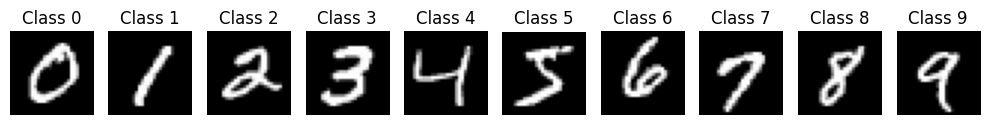

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for i, ax in enumerate(axes):
    img = X_train[y_train == i][0]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

reshape the training and testing data to match the input shape of a convolutional neural network (28x28 pixels with 1 color channel).

In [3]:
from keras.utils import to_categorical

# Reshape the data to fit the input shape of the CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert the target variable to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


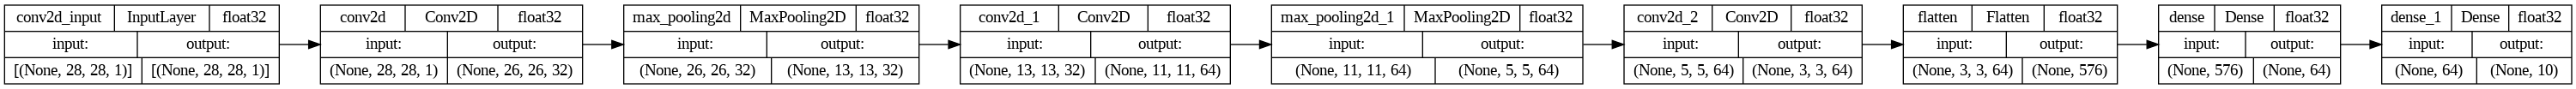

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


from keras.utils.vis_utils import plot_model
# Visualize the model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=True, show_dtype=True)



Epoch 1/100
469/469 [==============================] - 65s 134ms/step - loss: 0.4245 - accuracy: 0.9185 - val_loss: 0.0853 - val_accuracy: 0.9753
Epoch 2/100
469/469 [==============================] - 55s 117ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.0554 - val_accuracy: 0.9826
Epoch 3/100
469/469 [==============================] - 54s 114ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0477 - val_accuracy: 0.9842
Epoch 4/100
469/469 [==============================] - 54s 115ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0503 - val_accuracy: 0.9861
Epoch 5/100
469/469 [==============================] - 53s 114ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0462 - val_accuracy: 0.9864
Epoch 6/100
469/469 [==============================] - 54s 115ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0518 - val_accuracy: 0.9856
Epoch 7/100
469/469 [==============================] - 56s 119ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0586 -

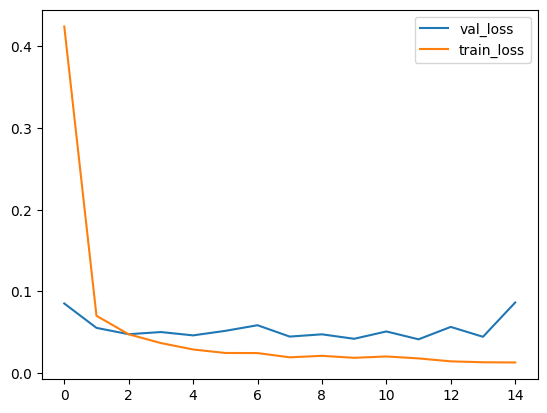

Test loss: 0.08646435290575027
Test accuracy: 0.9825999736785889


In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stop])

# Plot the validation loss and loss during training
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])